# US State COVID-19 Tracking and Analysis Notebook
**By Duncan McGough**

Written in Julia 

---
*Data from: [https://github.com/CSSEGISandData/COVID-19](https://github.com/CSSEGISandData/COVID-19)*

This notebook tracks COVID-19 confirmed cases and deaths for US states. Change the `path` variable, `states` vector, and add any population totals to `pop_dict` for states you'd like to look at. I created this notebook to practice Julia and data science on a practical real-world example. 

---

### Import packages

In [117]:
using Plots; #plotlyjs(); 
gr();
using CSV
using DataFrames
using Dates

### Define Hopkins COVID data path, define states

In [122]:
# Define data path
path = "/home/duncan/github/external/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/"

# Define desired states:
states = ["Colorado","South Dakota","California","Texas","Florida","Georgia"]

# Snag all the filenames of the files in the directory, omitting .gitignore and README
files = readdir(path)[2:end-1]

# Store dates
date_array = string.(zeros(length(files))) # allocate
for i ∈ 1:length(files)
    date_array[i] = files[i][1:end-4] # remove file extension
end

# Store dates in format for plotting
dates = Date.(date_array,"m-d-y")

# Create array to hold cases for each day for SD, confirmed+deaths
data = zeros(length(files),2,length(states))
sd_data = zeros(length(files),2);
co_data = zeros(length(files),2);

# Store state population, need to manually add 
pop_dict = Dict();
pop_dict["Colorado"] = 5.795e6
pop_dict["South Dakota"] = 884659
pop_dict["California"] = 39.51e6
pop_dict["Texas"] = 29e6
pop_dict["Florida"] = 21.48e6
pop_dict["New York"] = 8.399e6
pop_dict["Georgia"] = 10.62e6

# Store populations in order of request
pop = zeros(length(states))
for i=1:length(states)
    pop[i] = pop_dict[states[i]]
end

### Read in data

In [119]:
for i=1:length(files)
    #println("Reading in $(files[i])...")
    tmp = CSV.read(path*files[i])
    
    # Loop through states
    for j=1:size(tmp)[1]
        # check each state
        for k = 1:length(states) 
            if tmp[j,1] == states[k]
                data[i,1,k] = tmp[j,6] # store confirmed cases
                data[i,2,k] = tmp[j,7] # store deaths
            end
        end
    end
end

thread = 1 warning: only found 17 / 18 columns on data row: 140. Filling remaining columns with `missing`
thread = 1 warning: only found 17 / 18 columns on data row: 140. Filling remaining columns with `missing`


### Do some analysis:

In [120]:
# Finite difference for rough derivate
diff_state = diff(data,dims=1);

### Plot data:

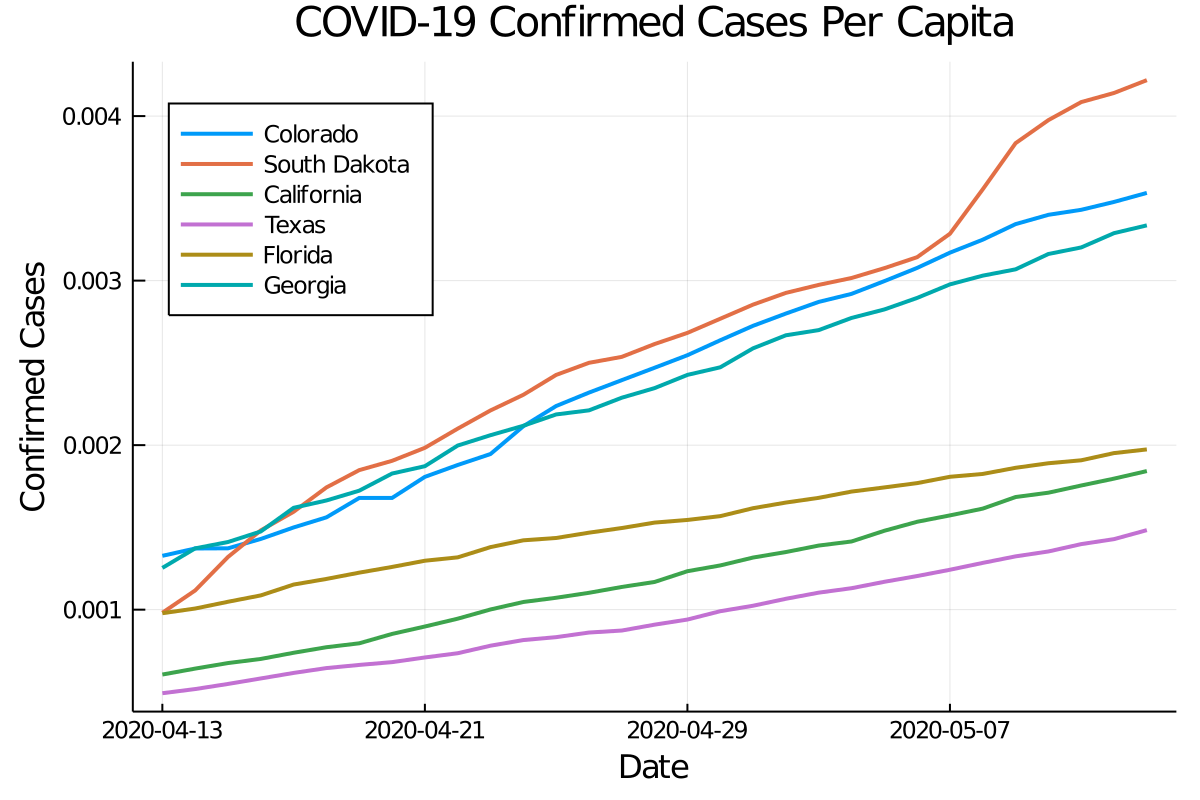

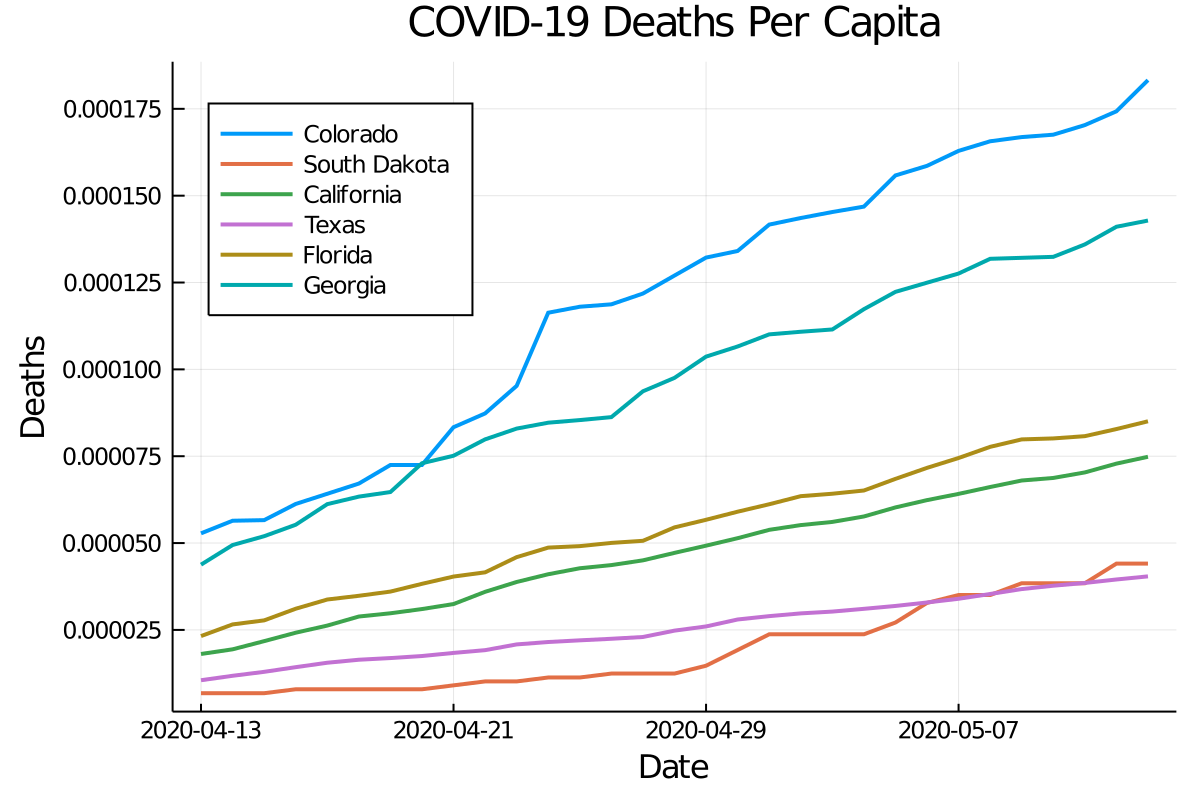

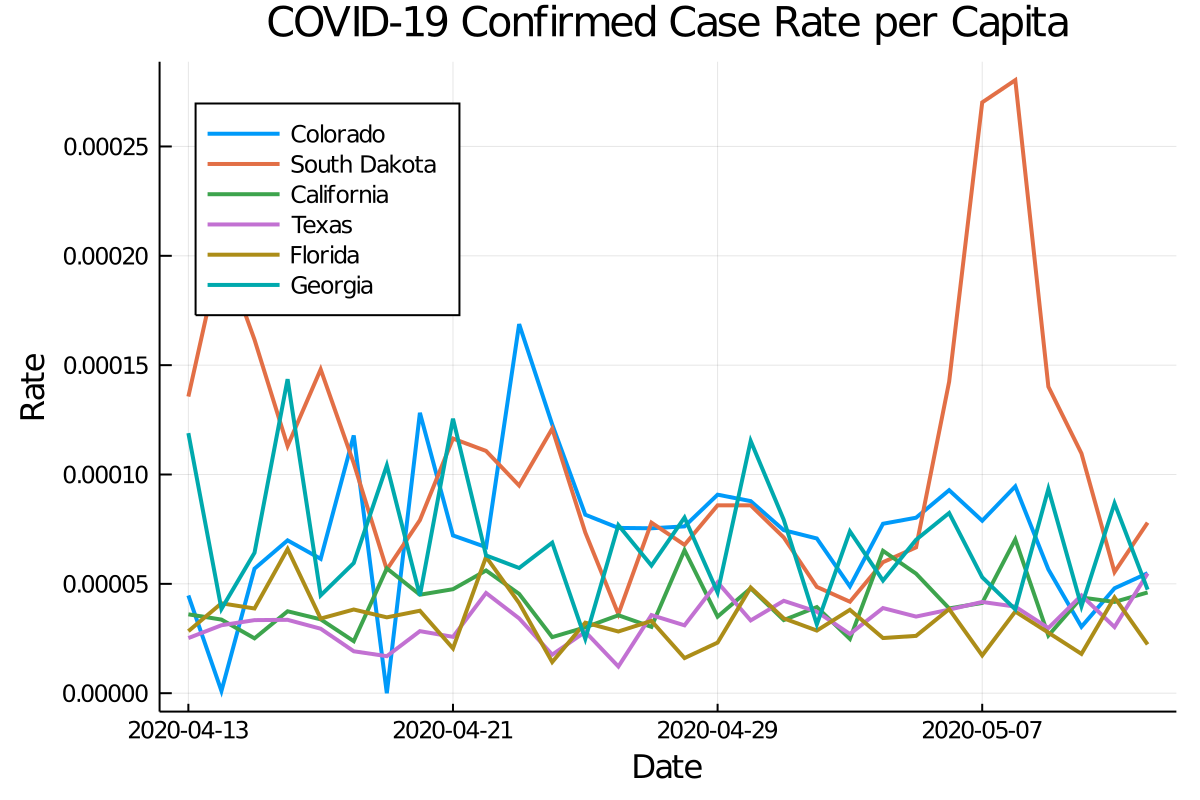

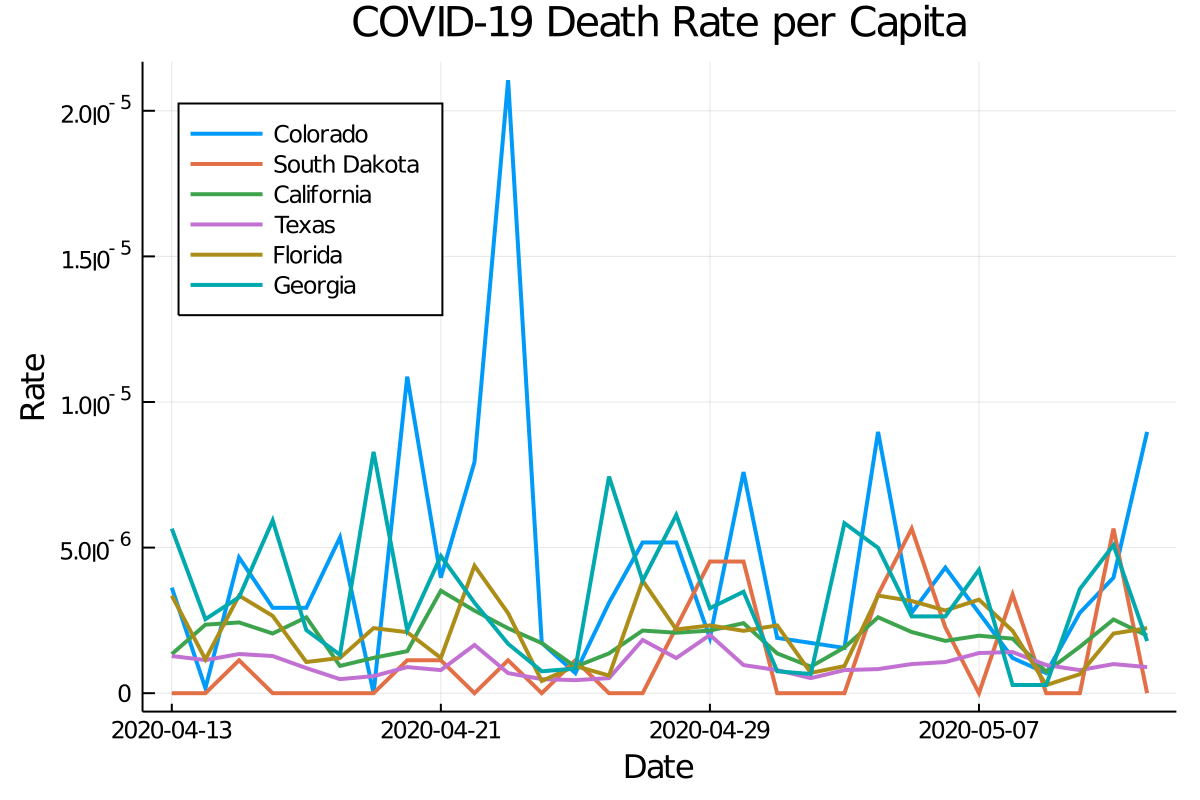

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [121]:
plt1 = plot(dpi=200,legend=:topleft)
for k=1:length(states)
    plot!(dates,data[:,1,k]./pop[k], 
    label=states[k],
    linewidth=2)
end
xlabel!("Date")
ylabel!("Confirmed Cases")
title!("COVID-19 Confirmed Cases Per Capita")

plt2 = plot(dpi=200,legend=:topleft)
for k=1:length(states)
    plot!(dates,data[:,2,k]./pop[k], 
    label=states[k],
    linewidth=2)
end
xlabel!("Date")
ylabel!("Deaths")
title!("COVID-19 Deaths Per Capita")

plt3 = plot(dpi=200,legend=:topleft)
for k=1:length(states)
    plot!(dates[1:end-1],diff_state[:,1,k]./pop[k], 
    label=states[k],
    linewidth=2)
end
xlabel!("Date")
ylabel!("Rate")
title!("COVID-19 Confirmed Case Rate per Capita")

plt4 = plot(dpi=200,legend=:topleft)
for k=1:length(states)
    plot!(dates[1:end-1],diff_state[:,2,k]./pop[k], 
    label=states[k],
    linewidth=2)
end
xlabel!("Date")
ylabel!("Rate")
title!("COVID-19 Death Rate per Capita")

# Save to file
savefig(plt1,"./figs/cases.png")
savefig(plt2,"./figs/deaths.png")
savefig(plt3,"./figs/caserate.png")
savefig(plt4,"./figs/deathrate.png")

# Display
display(plt1)
display(plt2)
display(plt3)
display(plt4)